# Introduction à  Xarray

Nous allons donner un exemple pratique de l'utilisation du module python **xarray** (aussi désigné par l'abréviation **xr**) qui est une pièce importante du module **xclim**. Pour ce faire nous allons faire une moyenne climatique saisonnière à partir de moyennes mensuelles en utilisant deux méthode:

1. En ne tenant pas compte du nombre de jours dans chaque mois
2. En pondérant les moyennes mensuelles par le nombre de jours dans chaque mois

Nous terminons en comparant le résulat des deux méthodes

## Importation des modules nécessaires

In [1]:
import xarray as xr
import matplotlib.pyplot as plt


## Ouverture du fichier et extraction des données

on commence par ouvrir un fichier de moyenne mensuelle de température. Ce fichier contient un **xr.Dataset** qui contient plusieurs variables dont **tas**, la température à 2m.




In [2]:
f_gcm = ('<path_to_file>/tas_Amon_CanESM2_historical_r1i1p1_185001-200512.nc')
ds_gcm = xr.open_dataset(f_gcm)
ds_gcm

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 64, lon: 128, time: 1872)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes:
    institution:            CCCma (Canadian Centre for Climate Modelling and ...
    institute_id:           CCCma
    experiment_id:          historical
    source:                 CanESM2 2010 atmosphere: CanAM4 (AGCM15i, T63L35)...
    model_id:               CanESM2
    forcing:                GHG,Oz,SA,BC,OC,LU,Sl,Vl (GHG includes CO2,CH4,N2...
    parent_experiment_id:   piControl
    parent_experiment_rip:  r1i1p1
    bra

On extrait ensuite le xr.DataArray de 'tas' du xr.Dataset

In [3]:
tas_gcm = ds_gcm.tas
tas_gcm


<xarray.DataArray 'tas' (time: 1872, lat: 64, lon: 128)>
[15335424 values with dtype=float32]
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    original_name:     ST
    cell_methods:      time: mean (interval: 15 minutes)
    cell_measures:     area: areacella
    history:           2011-03-16T18:49:59Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

On peut voir que **tas** a plusieurs coordonnées (lon, lat et time) et que la coordonnée time contient un attribut **season**. On peut se servir de cet attribut pour sélectionner les mois d'été (c. à d. **JJA**) seulement. On utilise ensuite l'attribut **time.dt.year** pour faire une sélection des années qui nous intéressent (1950-200 dans cet exemple).

In [4]:
tas_gcm.time
tas_gcm.time.dt.season

<xarray.DataArray 'season' (time: 1872)>
array(['DJF', 'DJF', 'MAM', ..., 'SON', 'SON', 'DJF'], dtype='<U3')
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
    height   float64 ...

In [5]:
# on extrait les mois d'été seulement
#
tas_gcm_jja = tas_gcm.sel(time = tas_gcm.time.dt.season == 'JJA')

tas_gcm_jja.time.dt.month

<xarray.DataArray 'month' (time: 468)>
array([6, 7, 8, ..., 6, 7, 8])
Coordinates:
  * time     (time) object 1850-06-16 00:00:00 ... 2005-08-16 12:00:00
    height   float64 ...

In [6]:
# on selectionne la periode 1950-2000
#
tas_gcm_jja_com = tas_gcm_jja.sel(time = (tas_gcm_jja.time.dt.year >= 1950) & (tas_gcm_jja.time.dt.year <= 2000))

# raccourci : on pourrait aussi utiliser:
#
#tas_gcm_jja_com = tas_gcm_jja.sel(time=slice('1950','2000'))

tas_gcm_jja_com.time.dt.year

<xarray.DataArray 'year' (time: 153)>
array([1950, 1950, 1950, 1951, 1951, 1951, 1952, 1952, 1952, 1953, 1953, 1953,
       1954, 1954, 1954, 1955, 1955, 1955, 1956, 1956, 1956, 1957, 1957, 1957,
       1958, 1958, 1958, 1959, 1959, 1959, 1960, 1960, 1960, 1961, 1961, 1961,
       1962, 1962, 1962, 1963, 1963, 1963, 1964, 1964, 1964, 1965, 1965, 1965,
       1966, 1966, 1966, 1967, 1967, 1967, 1968, 1968, 1968, 1969, 1969, 1969,
       1970, 1970, 1970, 1971, 1971, 1971, 1972, 1972, 1972, 1973, 1973, 1973,
       1974, 1974, 1974, 1975, 1975, 1975, 1976, 1976, 1976, 1977, 1977, 1977,
       1978, 1978, 1978, 1979, 1979, 1979, 1980, 1980, 1980, 1981, 1981, 1981,
       1982, 1982, 1982, 1983, 1983, 1983, 1984, 1984, 1984, 1985, 1985, 1985,
       1986, 1986, 1986, 1987, 1987, 1987, 1988, 1988, 1988, 1989, 1989, 1989,
       1990, 1990, 1990, 1991, 1991, 1991, 1992, 1992, 1992, 1993, 1993, 1993,
       1994, 1994, 1994, 1995, 1995, 1995, 1996, 1996, 1996, 1997, 1997, 1997,
       1998, 1

## Calcul de la moyenne saisonnière en utilisant la première méthode

`tas_gcm_jja_com` contient maintenant les moyennes mensuelles pour tous les mois de **JJA** entre 1950 et 2000. On peut donc faire la moyenne saisonnière de l'été en utilisant la première méthode (c. à d. aucune pondération par le nombre de jours dans chaque mois)

In [7]:
# on calcule la moyenne climatique en utilisant
# le même poids pour chaque mois
#
moy_gcm1 = tas_gcm_jja_com.mean(dim='time')



## Calcul de la moyenne saisonnière en utilisant la 2e méthode

On utilise maintenant la 2e méthode et on tient compte du nombre de jours dans chaque mois. 

On commence par générer un vecteur contenant le nombre de jours dans chaque mois pour une année de 365 jours (le GCM CanESM2 utilisé pour générer les données utilisées utilise un tel calendrier).

In [8]:
# on calcule le poids de chaques mois selon le nb de jours du mois dans une
# annee non bissextile
#
liste_nb_jours = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
nb_jours = [ liste_nb_jours[mois-1] for mois in 
            tas_gcm_jja_com.time.dt.month.values]
nb_jours

[30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31,
 30,
 31,
 31]

On utilise ensuite ces poids pour pondérer les moyennes mensuelles de chaque mois de `tas_gcm_jja_com`.

In [9]:
# on calcule la moyenne ponderee par le nombre de jours dans le mois
#
# on ajoute le poids au coordonnees de tas_gcm_jja_com
tas_gcm_jja_com['poids'] = ('time', nb_jours)

# on calcule la somme ponderée des moyennes mensuelles
numerateur = (tas_gcm_jja_com * tas_gcm_jja_com.poids).\
sum(dim='time')

# on calcule la somme des poids
denominateur = tas_gcm_jja_com.poids.sum(dim='time')

# on calcule la moyenne ponderée
moy_gcm2 = numerateur/denominateur

## Affichage des différences entre les résultats des deux méthodes

On peut maintenant calculer la différences entre les moyennes obtenues en utilisant les deux méthodes. On fait une figure de cette différence et on en affiche les valeurs min et max.

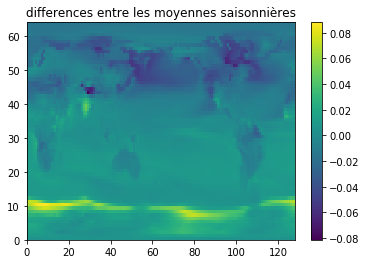

différences min/max = -0.08/0.09 (deg C)


In [10]:
# difference entre moy_gcm1 et moy_gcm2
#
diff = (moy_gcm1 - moy_gcm2).values
plt.pcolormesh(diff)
plt.colorbar()
plt.title('differences entre les moyennes saisonnières')
plt.show()
print('différences min/max = {:.2f}/{:.2f} (deg C)'.\
      format(diff.min(), diff.max()))
                                                        